In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
df = pd.read_csv('pcos_dataset.csv')
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [2]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [6]:
# Define features and target
X = df.drop(columns=['PCOS_Diagnosis'])  # Predicting PCOS Diagnosis
y = df['PCOS_Diagnosis']

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

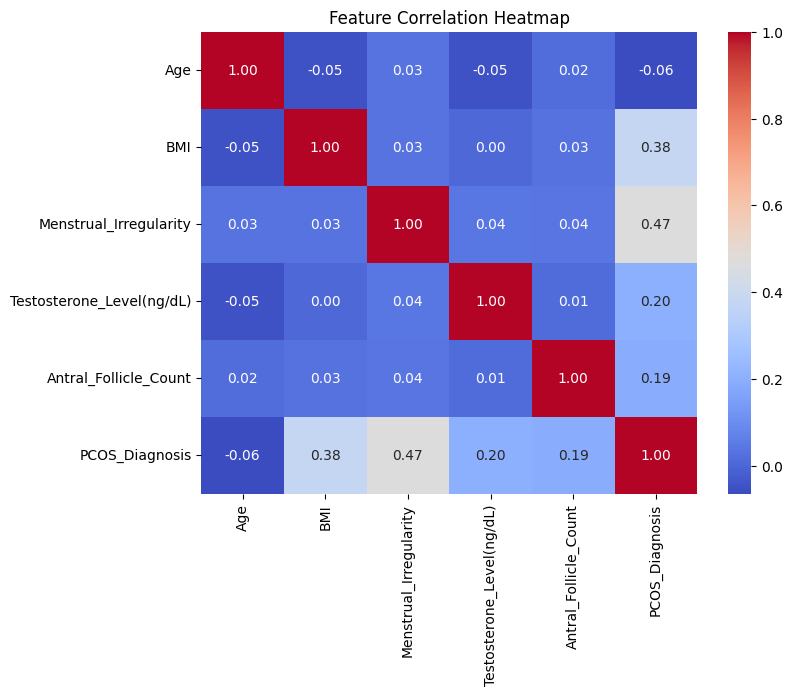

In [10]:
# --- Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

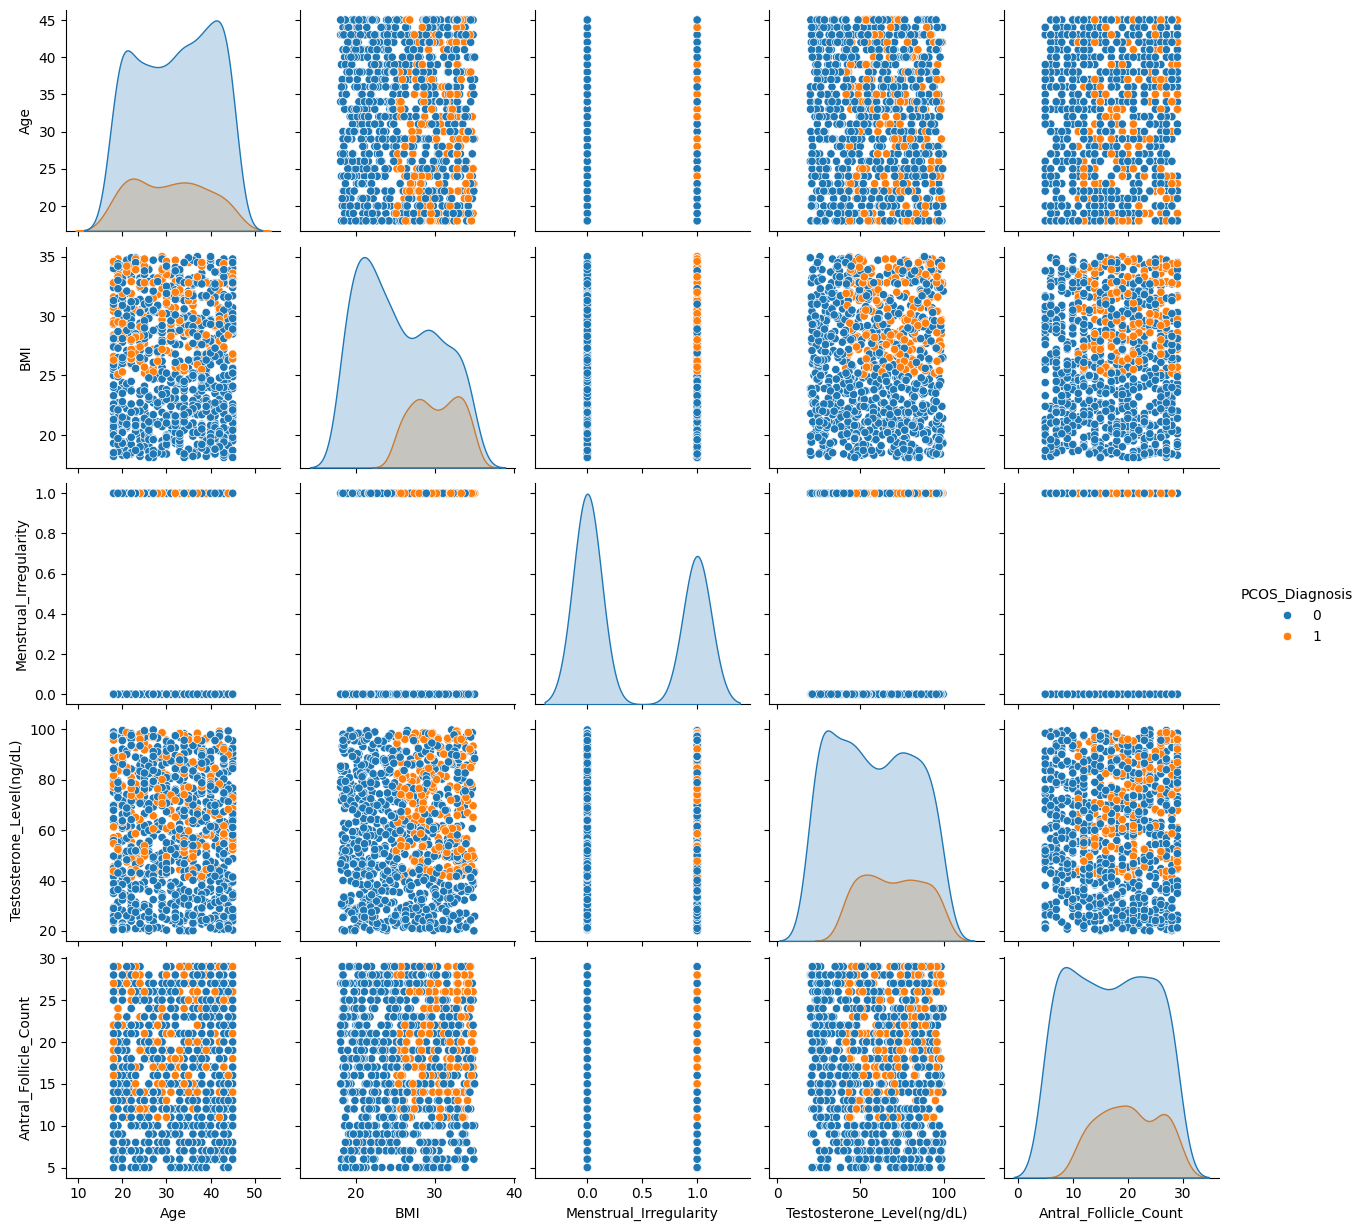

In [11]:
# --- Pairplot ---
sns.pairplot(df, hue='PCOS_Diagnosis')
plt.show()

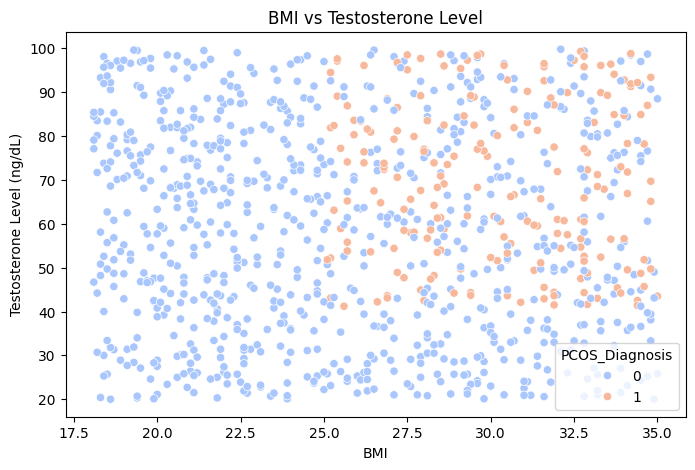

In [16]:
# --- BMI vs Testosterone Levels ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['BMI'], y=df['Testosterone_Level(ng/dL)'], hue=df['PCOS_Diagnosis'], palette='coolwarm')
plt.xlabel("BMI")
plt.ylabel("Testosterone Level (ng/dL)")
plt.title("BMI vs Testosterone Level")
plt.show()

In [12]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_pred_lr = lr.predict(X_test_scaled)

In [14]:
# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}")

Linear Regression - R2: 0.3601, MSE: 0.1004, MAE: 0.2638


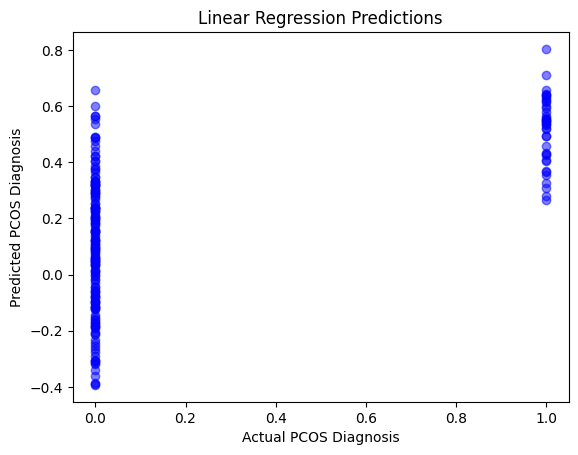

In [15]:
# Scatterplot
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel("Actual PCOS Diagnosis")
plt.ylabel("Predicted PCOS Diagnosis")
plt.title("Linear Regression Predictions")
plt.show()
